# ASSIGNMENT - 5

In [1]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
def showImages(num_row,num_col,X,Y):
    (X_rand, Y_rand) = shuffle(X, Y)
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
    return

In [4]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

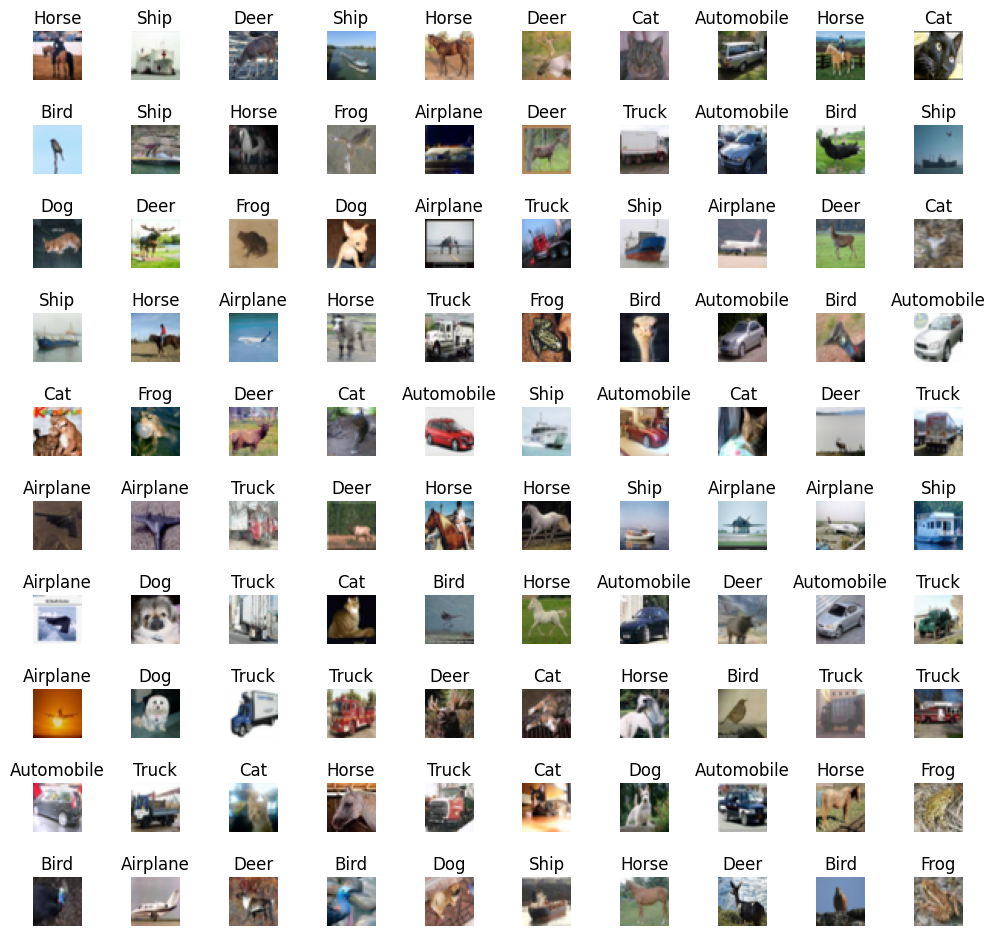

In [6]:
r = 10
c = 10
showImages(r,c,X =x_train,Y = y_train)

In [7]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

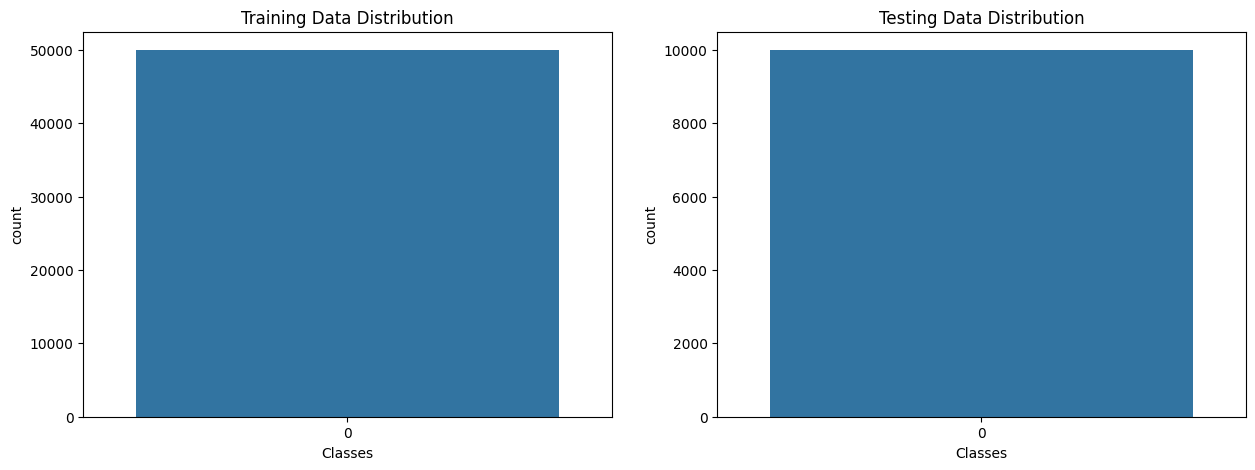

In [8]:
fig,axs = pyplot.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training Data Distribution')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing Data Distribution')
axs[1].set_xlabel('Classes')
pyplot.show()

In [9]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

# ASSIGNMENT - 6




In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
d = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')
texts = d['Consumer complaint narrative'].astype(str)
labels = d['Product']
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [16]:
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [17]:
label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
2/2 [==============================] - 4s 603ms/step - loss: 1.8230 - accuracy: 0.2625 - val_loss: 1.5529 - val_accuracy: 0.7619
Epoch 2/10
2/2 [==============================] - 0s 158ms/step - loss: 1.4576 - accuracy: 0.8000 - val_loss: 1.2051 - val_accuracy: 0.7619
Epoch 3/10
2/2 [==============================] - 0s 192ms/step - loss: 1.0757 - accuracy: 0.8000 - val_loss: 1.0663 - val_accuracy: 0.7619
Epoch 4/10
2/2 [==============================] - 0s 219ms/step - loss: 0.9276 - accuracy: 0.8000 - val_loss: 1.0360 - val_accuracy: 0.7619
Epoch 5/10
2/2 [==============================] - 0s 174ms/step - loss: 0.8804 - accuracy: 0.8000 - val_loss: 1.0533 - val_accuracy: 0.7619
Epoch 6/10
2/2 [==============================] - 0s 203ms/step - loss: 0.8636 - accuracy: 0.8000 - val_loss: 1.0787 - val_accuracy: 0.7619
Epoch 7/10
2/2 [==============================] - 0s 207ms/step - loss: 0.8458 - accuracy: 0.8000 - val_loss: 1.1002 - val_accuracy: 0.7619
Epoch 8/10
2/2 [====

In [19]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 48ms/step - loss: 1.1596 - accuracy: 0.7619
Test accuracy: 0.761904776096344


# ASSIGNMENT - 7

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')

X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [22]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
57/57 [==============================] - 17s 241ms/step - loss: 1.3841 - accuracy: 0.3111 - val_loss: 1.3829 - val_accuracy: 0.3167
Epoch 2/10
57/57 [==============================] - 16s 279ms/step - loss: 1.3832 - accuracy: 0.3141 - val_loss: 1.3800 - val_accuracy: 0.3167
Epoch 3/10
57/57 [==============================] - 15s 261ms/step - loss: 1.3935 - accuracy: 0.2843 - val_loss: 1.3965 - val_accuracy: 0.2377
Epoch 4/10
57/57 [==============================] - 15s 264ms/step - loss: 1.4029 - accuracy: 0.2826 - val_loss: 1.4019 - val_accuracy: 0.3132
Epoch 5/10
57/57 [==============================] - 15s 273ms/step - loss: 1.4037 - accuracy: 0.2831 - val_loss: 1.3862 - val_accuracy: 0.3062
Epoch 6/10
57/57 [==============================] - 14s 248ms/step - loss: 1.4025 - accuracy: 0.2831 - val_loss: 1.3980 - val_accuracy: 0.2572
Epoch 7/10
57/57 [==============================] - 15s 270ms/step - loss: 1.3915 - accuracy: 0.2992 - val_loss: 1.3834 - val_accuracy: 0.2696

In [25]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

99/99 [==============================] - 3s 34ms/step - loss: 1.3900 - accuracy: 0.2855
Test accuracy: 0.28548693656921387


In [26]:
example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Emotion:", predicted_emotion)

1/1 [==============================] - 0s 479ms/step
Predicted Emotion: anger
